<a href="https://colab.research.google.com/github/Ivasquez2003/Data-Mining/blob/main/Linear_Regression_Example_with_the_Fire_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to make predictions with a linear regression model

Completed by Isis Vasquez
Date: 1/28/2025


In [ ]:
import pandas as pd #file processing
import seaborn as sns #visualizations
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #metrics
import numpy as np #math

## Get the data (csv from url referencing github raw data view)

In [ ]:
fireIncidents = 'https://raw.githubusercontent.com/Ivasquez2003/Data-Mining/refs/heads/main/California_Fire_Incidents.csv'
fire = pd.read_csv(fireIncidents)

### This creates a new filtered dataframe named housing

In [ ]:
#fire = fire.query('acres_burned < 30000 and injuries < 100 and injuries > 0')

### This code creates a new boolean feature 'has_basement'

In [ ]:
#housing['has_basement'] = housing['sqft_basement'].apply(
    #lambda x: True if x > 0 else False)

### Drop columns that are not necessary for the problem by only keeping columns that are necessary

In [ ]:
columns_to_keep = ['AcresBurned', 'PersonnelInvolved','MajorIncident','StructuresDestroyed','Injuries',
                   'WaterTenders']
fire = fire[columns_to_keep]

## The Fires dataset

In [ ]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcresBurned          1633 non-null   float64
 1   PersonnelInvolved    204 non-null    float64
 2   MajorIncident        1636 non-null   bool   
 3   StructuresDestroyed  175 non-null    float64
 4   Injuries             120 non-null    float64
 5   WaterTenders         146 non-null    float64
dtypes: bool(1), float64(5)
memory usage: 65.6 KB


In [ ]:
fire.head(10)

,AcresBurned,PersonnelInvolved,MajorIncident,StructuresDestroyed,Injuries,WaterTenders
0,257314.0,NaN,False,NaN,NaN,NaN
1,30274.0,NaN,False,NaN,NaN,NaN
2,27531.0,NaN,False,NaN,NaN,NaN
3,27440.0,NaN,False,NaN,NaN,NaN
4,24251.0,2167.0,True,10.0,10.0,11.0
5,22992.0,NaN,False,NaN,NaN,NaN
6,20292.0,2106.0,True,40.0,26.0,20.0
7,14754.0,NaN,False,NaN,NaN,NaN
8,12503.0,NaN,False,NaN,NaN,NaN
9,11429.0,898.0,True,NaN,5.0,8.0


## How to identify correlations/trends with a scatterplot

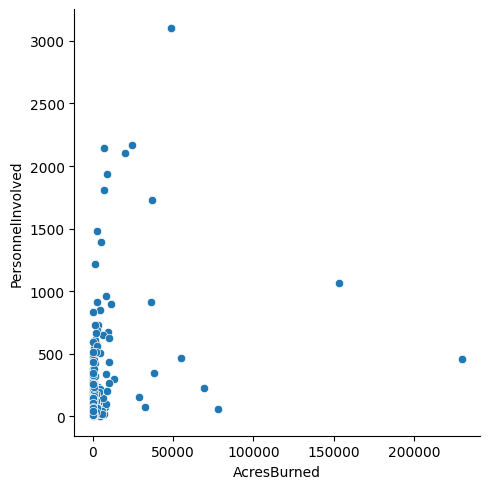

In [ ]:
sns.relplot(data=fire, x='AcresBurned', y='PersonnelInvolved')

In [37]:
fire_clean= fire.dropna(subset =['AcresBurned','PersonnelInvolved','MajorIncident','StructuresDestroyed','Injuries','WaterTenders'])

In [38]:
fire_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 4 to 1462
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcresBurned          35 non-null     float64
 1   PersonnelInvolved    35 non-null     float64
 2   MajorIncident        35 non-null     bool   
 3   StructuresDestroyed  35 non-null     float64
 4   Injuries             35 non-null     float64
 5   WaterTenders         35 non-null     float64
dtypes: bool(1), float64(5)
memory usage: 1.7 KB


###for this example, we are replacing all nulls with 0. This changes the data.

In [ ]:
fire_clean = fire_clean.fillna(0)

In [ ]:
#sns.relplot(data=fire, x='yr_built', y='price') #relationship plot

## How to identify correlations with a grid of scatterplots

In [ ]:
#sns.pairplot(data=housing,
            # y_vars=['price','sqft_living','sqft_above'],
            # x_vars=['price','sqft_living','sqft_above'],
             #diag_kind='kde')

## How to identify correlations with r-values

In [ ]:
#housing.corr().head()

In [ ]:
#housing.corr()[['price']].sort_values(by='price', ascending=False) #shows corr of each feature to price (note: price = 1)

## How to identify correlations with a heatmap

In [ ]:
#sns.heatmap(data=housing.corr(), cmap='Blues', vmin=-1.0, vmax=1.0)

In [ ]:
#sns.heatmap(data=housing.corr()[['price']].sort_values(by='price', ascending=False),
           # annot=True, cmap='Blues', cbar=False, fmt=f'.2f')

## How to create, validate, and use a linear regression model with scikit-learn
<p>Link to documentation for scikit-learn: <a href="https://scikit-learn.org/stable/">Scikit-Learn documentation</a></p>


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Explanation of x_train and test, y_train and test
<p>
x_train and x_test are the features (inputs).<br>
y_train and y_test are the target variables (outputs).<br>
The model separates the data 77% and 33% (train and test).<br>
The model uses x_train and y_train to learn, then is tested on x_test and compared with y_test to see how well it generalizes.</p>
<p>Random State Parameter: <br>
Without random_state (or random_state=None): Every time you run the code, the data might be split in a different way because the random shuffling changes each time.</p><p>

With random_state set to a specific number: The shuffling and splitting process will always be the same whenever you run the code, as long as the data doesn't change. This is useful for consistency, especially if you need to compare results across different runs or share your code with others and want them to get the same results.</p>

In [40]:
X = fire_clean[['PersonnelInvolved', 'MajorIncident', 'StructuresDestroyed', 'Injuries', 'WaterTenders']]
y = fire_clean['AcresBurned']

# split the data
x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.33, random_state=42)

# create the model from the training dataset
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

# Get predictions from the model using the test data
y_pred = linearModel.predict(x_test)

# validate the model with the test dataset, this is the R squared score
linearModel.score(x_test, y_test)

0.6957761545600663

### Summary of the Scores
<p>
R² (R-squared): How well the model fits the data.<br>
MAE (Mean Absolute Error): The average magnitude of errors in the predictions (in original units).<br>
MSE (Mean Squared Error): The average of the squared errors (penalizes large errors).<br>
RMSE (Root Mean Squared Error): The square root of MSE (in original units).<br>
MAPE (Mean Absolute Percentage Error): Percentage error (useful when comparing across datasets with different scales).<br>
</p>

In [41]:
# R-squared score (already calculated with .score())
r2 = linearModel.score(x_test, y_test)
print(f"R-squared: {r2:.3f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

R-squared: 0.696
Mean Absolute Error (MAE): 15278.98
Mean Squared Error (MSE): 1183857705.80
Root Mean Squared Error (RMSE): 34407.23
Mean Absolute Percentage Error (MAPE): 1087.53%


### Print the equation for the regression line

In [ ]:
# Get the slope (coefficient) and intercept
slope = linearModel.coef_[0][0]  # Get the first element as it's a single feature
intercept = linearModel.intercept_[0]

# Display the equation of the regression line
print(f"The equation of the regression line is: y = {slope:.2f}x + {intercept:.2f}")

The equation of the regression line is: y = 11.42x + 4294.95


### Explanation of Regression Line
<p>The slope of 157.05 means each additional square foot increases the price by 157.05. The intercept of 160591.26 means that if the house has 0 squar feet (a theoritial baseline), the predicted price will be 160,591.26.</p>

In [ ]:
# use the model to make predictions
y_predicted = linearModel.predict(x_test)
y_predicted

array([[10029.52769235],
       [12588.3845399 ],
       [ 7048.00252623],
       [ 7379.28310025],
       [20196.41427412],
       [ 9172.76758714],
       [12599.80800797],
       [ 6008.46693192],
       [ 4923.23746532],
       [ 4694.76810393],
       [12199.98662554],
       [ 6488.25259083],
       [ 5208.82416706],
       [16460.94021543],
       [ 5334.48231582],
       [ 8041.84424827],
       [ 4340.64059378],
       [ 5528.681273  ],
       [ 4900.39052918],
       [ 5265.9415074 ],
       [ 4751.88544428],
       [ 4980.35480567],
       [ 5665.76288983],
       [ 7630.59939777],
       [ 5403.02312424],
       [ 7516.36471708],
       [11446.03773296],
       [ 4809.00278463],
       [ 4386.33446606],
       [ 6042.73733612],
       [ 5437.29352845],
       [ 4500.56914675],
       [11743.04790276],
       [ 6750.99235643],
       [ 4786.15584849],
       [14735.99653694],
       [ 9983.83382007],
       [ 4409.1814022 ],
       [ 4923.23746532],
       [ 7150.81373886],


## How to plot the predicted data

In [ ]:
# put predicted values in a frame
predicted = pd.DataFrame(y_predicted, columns=['price_predicted'])

# combine the test data and the predicted data
combined = predicted.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])

# show combined
combined.head()

,price_predicted,PersonnelInvolved,AcresBurned
0,10029.527692,502.0,712.0
1,12588.384540,726.0,3166.0
2,7048.002526,241.0,441.0
3,7379.283100,270.0,673.0
4,20196.414274,1392.0,4883.0


In [ ]:
#melt the data in order to improve some of the visualizations
# melt price and price_predicted columns into a single column
#melted = pd.melt(combined, id_vars=['sqft_living'],
                 #value_vars=['price','price_predicted'],
                 #var_name='price_type', value_name='price_value')
#melted.head()

In [ ]:
# Sort by 'sqft_living' in ascending order and display the top rows in order to see the results of melting the dataframe better
#melted_sorted = melted.sort_values(by='sqft_living', ascending=True)  # Change to False for descending
#melted_sorted.head()

In [ ]:
#relationship plot
#sns.relplot(data=melted, x='sqft_living', y='price_value',
            #hue='price_type')

## How to plot the residuals

In [ ]:
#combined['residual'] = combined.price - combined.price_predicted
#combined.head()

In [ ]:
#g = sns.relplot(data=combined, x='sqft_living', y='residual')

# draw a horizontal line where the Y axis is 0
#for ax in g.axes.flat:
    #ax.axhline(0, ls='--')

## How to plot a linear regression

In [ ]:
#sns.lmplot(data=housing, x='sqft_living', y='price', ci=None,
           #scatter_kws={'s':5}, line_kws={'color':'red'})

## How to plot a logistic regression

In [ ]:
#sns.lmplot(data=housing, x='price', y='has_basement', ci=None,
           #scatter_kws={'s':1}, line_kws={'color':'red'},
           #logistic=True)

## How to plot residuals with Seaborn

In [ ]:
#sns.residplot(data=housing, x='sqft_living', y='price',
              #scatter_kws={'s':5})